# Лабораторная работа №2
# Глобальная оптимизация и метаэврестические алгоритмы

Задание на лабораторную работу:
В Pygmo запрогроммировать две своих тестовых функции и найти их оптимум 3 разными алгоритмами доступными в библиотеке и получить таблицу сравнения

В данной работе используются функция Розенброка и функция сферы (по аналогии с лабораторной работой№1)

# Были выбраны следующие методы оптимизации:
1. Метод муравьиной колонии
2. Простой генетический алгоритм
3. Стаи серых волков

In [1]:
!pip3 install pygmo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 33.6 MB/s eta 0:00:00


In [3]:
import pandas as pd


df = pd.DataFrame({'Name_of_function':[], 'Extended Ant Colony Optimization':[], 'Simple Genetic Algorithm':[], 'Grey wolf optimizer':[]})

df

,Name_of_function,Extended Ant Colony Optimization,Simple Genetic Algorithm,Grey wolf optimizer


In [4]:
from pickle import bytes_types
import pygmo as pg

class Rosenbrock:
  def __init__(self):
    self.dim = 2
    self.lower_bound = -2
    self.upper_bound = 2

  def fitness(self, x):
    return [-(1 - x[0])**2 - 100*(x[1] - x[0]**2)**2]
  def get_bounds(self):
    return ([self.lower_bound] * self.dim, [self.upper_bound] * self.dim)
algorithms = [pg.gaco(gen = 100), pg.sga(gen = 100),  pg.gwo(gen = 100)]
best_solutions = []
for algo in algorithms:
  pr = pg.problem(Rosenbrock())
  algo = pg.algorithm(algo)
  population = pg.population(pr,size = 10000)
  population = algo.evolve(population)

  best_fitness = population.get_f()[0]
  best_solution = population.get_x()[0]
  best_solutions.append(str(best_solution[0]) + ' ' + str(best_solution[1]))
df.loc[len(df.index)] = ['Rosenbrock'] + best_solutions

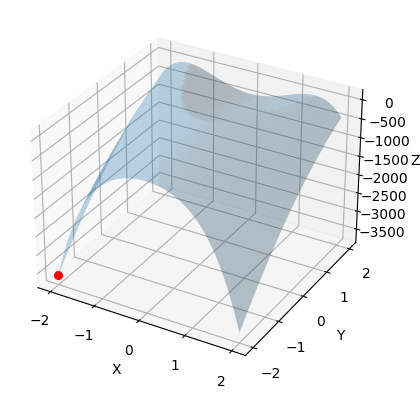

In [5]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-2, 2, 100) # change
y = np.linspace(-2, 2, 100) # change
X, Y = np.meshgrid(x,y)
Z = -(1 - X)**2 - 100*(Y - X**2)**2

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(X,Y,Z,alpha = 0.3)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter(best_solution[0], best_solution[1], best_fitness, c = 'r', s = 30)

In [6]:
from pickle import bytes_types
import pygmo as pg

class Sphere:
  def __init__(self):
    self.dim = 2
    self.lower_bound = -2
    self.upper_bound = 2

  def fitness(self, x):
    return [sum(x[0]**2)]
  def get_bounds(self):
    return ([self.lower_bound] * self.dim, [self.upper_bound] * self.dim)
algorithms = [pg.gaco(gen = 100), pg.sga(gen = 100),  pg.gwo(gen = 100)]
best_solutions = []
for algo in algorithms:
  pr = pg.problem(Rosenbrock())
  algo = pg.algorithm(algo)
  population = pg.population(pr , size = 100)
  population = algo.evolve(population)

  best_fitness = population.get_f()[0]
  best_solution = population.get_x()[0]

  best_solutions.append(str(best_solution[0]) + ' ' + str(best_solution[1]))

df.loc[len(df.index)] = ['Shere'] + best_solutions

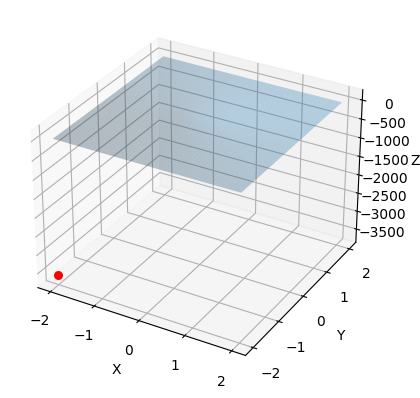

In [7]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-2, 2, 100) # change
y = np.linspace(-2, 2, 100) # change
X, Y = np.meshgrid(x,y)
Z = X**2 + Y**2

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(X,Y,Z,alpha = 0.3)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter(best_solution[0], best_solution[1], best_fitness, c = 'r', s = 30)

# Таблица сравнения

In [8]:
df

,Name_of_function,Extended Ant Colony Optimization,Simple Genetic Algorithm,Grey wolf optimizer
0,Rosenbrock,-1.9999999996349824 -1.999999963594671,-1.9999999999999838 -1.9999999999998646,-1.9999999447228207 -1.9999996386098025
1,Shere,1.9999999799850072 -1.9999999149707393,-1.9999999984893513 -1.9999999811379456,-1.9999990914734156 -1.9999661757800204
